# JLD2 to CSV
This script convets `.jld2` files and compiles them into a `.csv` file which can then be imported into a DataFrame.

In [10]:
using PorousMaterials
using FileIO
using JLD2
using CSV
using DataFrames
using Printf
using PyPlot

In [64]:
pressures = 10 .^ range(-2, stop=log10(300), length=15)
frameworks = ["COF-102", "COF-103"]
PorousMaterials.PATH_TO_DATA

"/home/simoncor/PropellantStorage/data"

In [67]:
function isotherm_sim_results_to_dataframe(props_we_want::Array{String},
        frameworkname::String, gas::Symbol, forcefieldname::String, temperature::Float64, 
        pressures::Array{Float64}, n_burn_cycles::Int, n_sample_cycles::Int; 
        where_are_jld_files::Union{String, Nothing}=nothing)
    if isnothing(where_are_jld_files)
        where_are_jld_files = joinpath(PorousMaterials.PATH_TO_DATA, "gcmc_sims")
    end
    # prepare dataframe to populate
    df = DataFrame()
    for col in props_we_want
        insertcols!(df, length(names(df)) + 1, Symbol(col) => Float64[])
    end

    for (i, pressure) in enumerate(pressures)
        sim_result = load(
            joinpath(where_are_jld_files, 
                gcmc_result_savename(frameworkname, gas, forcefieldname, 
                    temperature, pressure, n_burn_cycles, n_sample_cycles) * ".jld2"
            ), "results"
        )
        push!(df, [sim_result[prop] for prop in props_we_want])
    end
    return df
end

props_we_want = ["pressure (bar)", "fugacity (bar)", "⟨N⟩ (mmol/g)"]
for frameworkname in frameworks
    df = isotherm_sim_results_to_dataframe(props_we_want, frameworkname,
        :Xe, "Dreiding", 298.0, pressures, 25000, 25000)
    CSV.write(joinpath("data", "sim_isotherms", frameworkname * ".csv"), df)
end

Error encountered while loading "/home/simoncor/PropellantStorage/data/gcmc_sims/gcmc_COF-102_Xe_T298.000000_P0.010000_Dreiding_25000burn_25000sample.jld2".

Fatal error:


SystemError: SystemError: opening file "/home/simoncor/PropellantStorage/data/gcmc_sims/gcmc_COF-102_Xe_T298.000000_P0.010000_Dreiding_25000burn_25000sample.jld2": No such file or directory

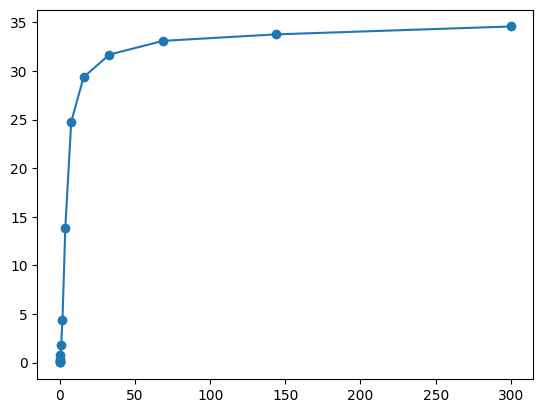

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f880e9c34e0>

In [56]:
figure()
plot(df[:, Symbol("pressure (bar)")], df[:, Symbol("⟨N⟩ (mmol/g)")], marker="o")